In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import glob
import pandas as pd
from IPython.display import display
from collections import Counter

# Log reader for day 1
## log gives 1k itterations, previous days data has 10k itterations so scaled by 10
## all outputs from log should be on same line (i.e. every line starts with a time stamp)

In [2]:
#importing data from txt
dirc = os.getcwd()
filenames = glob.glob(dirc+'/*.log')
#all outputs from log should be on same line (i.e. every line starts with a time stamp)
dirc = os.getcwd()
dataframes = {}
filenames = glob.glob(dirc+'/*.log')

for file in filenames:
    product = []
    positions = []
    mm_order = []
    size = []
    timestamp = []
    price = []
    spread = []
    data = pd.DataFrame()
    f = open(file,"r")
    for line in f:
        #removes first few lines on text
        if re.search(r'(^\d*0)', line) == None:
            #print(line)
            continue
        try:
            timestamp.append(int(re.search(r'(^\d*0)', line).group(1)))
        except:
            print('failed')
            
        if 'position: ' in line:
            product.append(str(re.search(r'(PEARLS|BANANA)', line).group(1)))
            positions.append(int(re.search(r'position: (-?\d*)', line).group(1)))
            if 'MM' in line:
                mm_order.append('MM')
                size.append(str(re.findall(r'(\d*.?\d*)x', line)[0])+'/-'+str(re.findall(r'(\d*.?\d*)x', line)[1]))
                price.append(str(re.findall(r'x (\d*)', line)[0])+'/'+str(re.findall(r'x (\d*)', line)[1]))
                spread.append(int(re.search(r'Spread:  *(\d*)', line).group(1)))
            elif 'MISSED' in line:
                mm_order.append('MISSED')
                spread.append(0)
                size.append(float(re.search(r'(\d*.?\d*)x', line).group(1)))
                price.append(float(re.search(r'x (\d*)', line).group(1)))
            else:
                spread.append(0)
                mm_order.append(re.search(r'(SELL|BUY)', line).group(1))
                if re.search(r'(SELL|BUY)', line).group(1) == 'SELL':
                    size.append(-float(re.search(r'(\d*.?\d*)x', line).group(1)))
                else:
                    size.append(float(re.search(r'(\d*.?\d*)x', line).group(1)))
                price.append(float(re.search(r'x (\d*)', line).group(1)))
        else:
            #no trades occured
            product.append(np.nan)
            positions.append(np.nan)
            mm_order.append(np.nan)
            size.append(np.nan)
            price.append(np.nan)
            spread.append(np.nan)

    data['timestamp'] = timestamp
    data['Product'] = product
    data['Position'] = positions
    data['MM/order'] = mm_order
    data['Size_available'] = size
    data['Price'] = price
    data['Spread'] = spread
    data2 = data.dropna()
    name = re.search(r'\\(log.*)\.log$', file).group(1)
    dataframes[name] = data2
    

for name in dataframes:
    display(dataframes[name])
#print(data2)
#print(data.describe())

#when are no trades
maskna = ((np.isnan(data['Position']) == True))
data_notrades = data.loc[maskna, :]
display(data_notrades)

,timestamp,Product,Position,MM/order,Size_available,Price,Spread
1,100,PEARLS,-1.0,SELL,-1.0,10002.0,0.0
2,200,PEARLS,-1.0,MM,8.0/-7.0,9997/10003,8.0
3,300,PEARLS,-2.0,MM,8.0/-7.0,9996/10004,10.0
4,400,PEARLS,-2.0,MM,8.0/-7.0,9999/10003,6.0
5,500,PEARLS,-2.0,MM,8.0/-7.0,9999/10003,6.0
...,...,...,...,...,...,...,...
995,99500,PEARLS,-4.0,BUY,3.0,9998.0,0.0
996,99600,PEARLS,-4.0,MM,9.0/-6.0,9996/10004,10.0
997,99700,PEARLS,-4.0,MM,9.0/-6.0,9996/10004,10.0
998,99800,PEARLS,-2.0,MM,8.0/-7.0,9997/10001,6.0


,timestamp,Product,Position,MM/order,Size_available,Price,Spread
1,0,PEARLS,0.0,MM,5.0/-5.0,9999/10004,7.0
2,100,PEARLS,-1.0,SELL,-1.0,10002.0,0.0
3,200,PEARLS,-1.0,MM,5.0/-4.0,9997/10003,8.0
4,300,PEARLS,-2.0,MM,5.0/-4.0,9996/10004,10.0
5,400,PEARLS,-2.0,MM,5.0/-4.0,9999/10003,6.0
...,...,...,...,...,...,...,...
996,99500,PEARLS,0.0,BUY,3.0,9998.0,0.0
997,99600,PEARLS,0.0,MM,5.0/-5.0,9996/10004,10.0
998,99700,PEARLS,0.0,MM,5.0/-5.0,9996/10004,10.0
999,99800,PEARLS,2.0,MM,4.0/-5.0,9997/10001,6.0


,timestamp,Product,Position,MM/order,Size_available,Price,Spread
1,100,PEARLS,-1.0,SELL,-1.0,10002.0,0.0
2,200,PEARLS,-1.0,MM,10.0/-9.0,9997/10003,8.0
3,300,PEARLS,-2.0,MM,11.0/-9.0,9996/10004,10.0
4,400,PEARLS,-2.0,MM,11.0/-9.0,9999/10003,6.0
5,500,PEARLS,-2.0,MM,11.0/-9.0,9999/10003,6.0
...,...,...,...,...,...,...,...
995,99500,PEARLS,-6.0,BUY,3.0,9998.0,0.0
996,99600,PEARLS,-6.0,MM,13.0/-7.0,9996/10004,10.0
997,99700,PEARLS,-6.0,MM,13.0/-7.0,9996/10004,10.0
998,99800,PEARLS,-4.0,MM,12.0/-8.0,9997/10001,6.0


,timestamp,Product,Position,MM/order,Size_available,Price,Spread
1,100,PEARLS,-1.0,SELL,-1.0,10002.0,0.0
2,200,PEARLS,-1.0,MM,8.0/-7.0,9997/10003,8.0
3,300,PEARLS,-2.0,MM,8.0/-7.0,9996/10004,10.0
4,400,PEARLS,-2.0,MM,8.0/-7.0,9999/10003,6.0
5,500,PEARLS,-2.0,MM,8.0/-7.0,9999/10003,6.0
...,...,...,...,...,...,...,...
995,99500,PEARLS,-4.0,BUY,3.0,9998.0,0.0
996,99600,PEARLS,-4.0,MM,9.0/-6.0,9996/10004,10.0
997,99700,PEARLS,-4.0,MM,9.0/-6.0,9996/10004,10.0
998,99800,PEARLS,-2.0,MM,8.0/-7.0,9997/10001,6.0


,timestamp,Product,Position,MM/order,Size_available,Price,Spread
0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,800,NaN,NaN,NaN,NaN,NaN,NaN
14,1400,NaN,NaN,NaN,NaN,NaN,NaN
18,1800,NaN,NaN,NaN,NaN,NaN,NaN
41,4100,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2995,0,NaN,NaN,NaN,NaN,NaN,NaN
2996,0,NaN,NaN,NaN,NaN,NaN,NaN
2997,0,NaN,NaN,NaN,NaN,NaN,NaN
2998,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for n in dataframes:
    print(n)
data2 = dataframes['log_MM_v2']

log_MM_v1.1
log_MM_v1
log_MM_v2.1
log_MM_v2


# MM analysis

In [4]:
def get_data(data2):
    '''
    takes in data from the reading
    outputs data for all further analysis
    '''
    #MM trades delayed position only updates tick after 
    data2['Pos_T-1'] = data2['Position'].shift()
    data2['Pos_T-1'][1] = 0
    data2['Change'] = data2['Position'] - data2['Pos_T-1']
    ## did MM trade?


    #print(data2.columns)
    mm = []
    for i, *row in data2.itertuples():
        #(data2['MM/order'] == 'MM') and (data2['Change'] != 0)
        m = data2.columns.get_loc('MM/order')
        c = data2.columns.get_loc('Change')
        if row[m] == 'MM' and row[c] != 0:
            mm.append(True)
        else:
            mm.append(False)

    data2['MMtrade?'] = mm
    
    data2['Pos_T-1'] = data2['Position'].shift()
    data2['Pos_T-1'][1] = 0
    data2['Change'] = data2['Position'] - data2['Pos_T-1']
    ## did MM trade?


    #print(data2.columns)
    mm = []
    for i, *row in data2.itertuples():
        #(data2['MM/order'] == 'MM') and (data2['Change'] != 0)
        m = data2.columns.get_loc('MM/order')
        c = data2.columns.get_loc('Change')
        s = data2.columns.get_loc('Size_available')
        if row[m] == 'MM' and row[c] != 0:
            mm.append(True)
        elif (row[m] == 'BUY' or row[m] == 'SELL') and row[c] != row[s]:
            mm.append(f'Double/{row[c]-row[s]}')
        else:
            mm.append(False)

    data2['MMtrade?'] = mm
    data2['RealMMtrade?'] = data2['MMtrade?'].shift(-1)
    data2['Change_t+1'] = data2['Change'].shift(-1)

    mmsize = []
    for i, *row in data2.itertuples():
        m = data2.columns.get_loc('RealMMtrade?')
        c = data2.columns.get_loc('Change_t+1')
        if row[m] == True:
            mmsize.append(row[c])
        elif bool(re.match('Double',str(row[m]))):
            mmsize.append(float(row[m].split('/')[1]))
        else:        
            mmsize.append(0)
    data2['MM_size'] = mmsize
    # Remove column name 'MMtrade?' and 'Change_t+1'
    data3 = data2.drop(['MMtrade?', 'Change_t+1'], axis=1)
    return data3
data3 = get_data(data2)
print(data3['RealMMtrade?'].describe())
display(data3.loc[(data3['RealMMtrade?'] != False) & (data3['RealMMtrade?'] != True), :])
#display(data3.iloc[600:605])

count       939
unique       10
top       False
freq        861
Name: RealMMtrade?, dtype: object


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'] = data2['Position'].shift()
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,timestamp,Product,Position,MM/order,Size_available,Price,Spread,Pos_T-1,Change,RealMMtrade?,MM_size
310,31000,PEARLS,-2.0,MM,8.0/-7.0,9997/10001,6.0,-2.0,0.0,Double/-1.0,-1.0
376,37600,PEARLS,-7.0,MM,10.0/-5.0,9997/10003,8.0,-7.0,0.0,Double/-5.0,-5.0
439,43900,PEARLS,-17.0,MM,14.0/-1.0,9997/10001,6.0,-17.0,0.0,Double/-1.0,-1.0
586,58600,PEARLS,-16.0,MM,14.0/-1.0,9997/10003,8.0,-16.0,0.0,Double/1.0,1.0
599,59900,PEARLS,-20.0,MM,16.0/-0.0,9997/10003,8.0,-20.0,0.0,Double/2.0,2.0
628,62800,PEARLS,-2.0,MM,8.0/-7.0,9996/10004,10.0,-2.0,0.0,Double/8.0,8.0
646,64600,PEARLS,4.0,MM,6.0/-9.0,9997/10003,8.0,4.0,0.0,Double/6.0,6.0
661,66100,PEARLS,9.0,MM,4.0/-11.0,9997/10003,8.0,9.0,0.0,Double/-2.0,-2.0
685,68500,PEARLS,12.0,MM,3.0/-12.0,9997/10003,8.0,12.0,0.0,Double/-1.0,-1.0
703,70300,PEARLS,10.0,MM,4.0/-12.0,9999/10003,6.0,10.0,0.0,Double/-1.0,-1.0


In [5]:
def get_mmhitrate(data3):
    #print(data2['MM/order'].describe())
    mm_orders = data3[data3['MM/order'] == 'MM']['MM/order'].count()
    #print(data2['MMtrade?'].describe())
    hits = data3[data3['RealMMtrade?'] != False]['RealMMtrade?'].count()
    hit_rate = hits/mm_orders *100
    print(hits, ' MM hits out of ', mm_orders, ' orders sent')
    print('Hit rate was {:.03f} %'.format(hit_rate))
    return
get_mmhitrate(data3)

78  MM hits out of  764  orders sent
Hit rate was 10.209 %


In [6]:
def get_mmhits(data3):
    #accounting for lag in MM execution
    #MM hit data
    mask3 = (data3['RealMMtrade?'] == True)
    data_mmhits2 = data3.loc[mask3, :]
    #print(data_mmhits.describe())
    #display(data_mmhits)
    ## note spread is the spread before our MM

    ###adds market maker bid and ask column
    #print(data_mmhits.columns)
    #print(data_mmhits.columns.get_loc('Change'))
    mmbid = []
    mmask = []
    for bid, ask in data_mmhits2['Price'].str.split('/'):
        mmbid.append(int(bid))
        mmask.append(int(ask))

    data_mmhits2['MM_Bid'] = mmbid
    data_mmhits2['MM_Ask'] = mmask

    #adds theo profit of individual trades column
    fv = 10000
    theo = []
    for i, *row in data_mmhits2.itertuples():
        c = data_mmhits2.columns.get_loc('MM_size')
        b = data_mmhits2.columns.get_loc('MM_Bid')
        a = data_mmhits2.columns.get_loc('MM_Ask')
        if row[c] > 0:
            #bought on mmbid
            theo.append(row[c]*(fv-row[b]))
        elif row[c] < 0:
            #sold on mmask
            theo.append(-row[c]*(row[a]-fv))
        else:
            #no trade
            theo.append(0)

    data_mmhits2['Theo'] = theo

    #min and max of ask and bid should be at min +-1 of FV
    # print(data_mmhits.describe())
    #display(data3)
    print(f'Theoretical MM PnL: {sum(theo)}')
    #display(data_mmhits2)
    ##might be useful to calculate a hit rate at each spread, woudl require more testing 
    #then can maximise for profit (half) spread*hitrate
    return data_mmhits2
data_mmhits2 = get_mmhits(data3)

Theoretical MM PnL: 469.0


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\927695648.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mmhits2['MM_Bid'] = mmbid
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\927695648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mmhits2['MM_Ask'] = mmask
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\927695648.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [7]:
def get_pnl(data3):
    data_pnl = data3.copy()
    #display(data3)
    cash = []
    curr = 0
    mmtrades = 0
    otrades = 0
    mmsale = 0
    for i, *row in data_pnl.itertuples():
        m = data_pnl.columns.get_loc('MM/order')
        ms = data_pnl.columns.get_loc('MM_size')
        s = data_pnl.columns.get_loc('Size_available')
        p = data_pnl.columns.get_loc('Price')
        curr -= mmsale
        mmsale = 0
        if row[m] == 'MM':
            b = float(row[p].split('/')[0])
            a = float(row[p].split('/')[1])
            if row[ms] > 0:
                #bought on mmbid
                mmsale = row[ms]*b
                mmtrades += 1
            elif row[ms] < 0:
                #sold on mmask
                mmsale = row[ms]*a
                mmtrades += 1
            else:
                None
                #no trade
        elif row[m] == 'SELL':
            #change is -ve so curr -= so increases
            curr -= row[s]*row[p]
            otrades += 1
        elif row[m] == 'BUY':
            #cahnge is +ve so curr -= so decreases
            curr -= row[s]*row[p]
            otrades += 1
        else:
            None
        cash.append(curr)

    data_pnl['Cash'] = cash
    #display(data_pnl.iloc[100:120])
    pnl = []
    #can change to mid value if data collected and input into the dataframe
    #use same row index method
    fv = 10000
    for i, *row in data_pnl.itertuples():
        c = data_pnl.columns.get_loc('Cash')
        p = data_pnl.columns.get_loc('Position')
        pnl.append(row[c]+row[p]*fv)

    data_pnl['PnL'] = pnl

    #display(data_pnl)

    cash_final = data_pnl.iloc[-1]['Cash']
    pos_final = data_pnl.iloc[-1]['Position']
    pnl_final = data_pnl.iloc[-1]['PnL']
    print(f'Total trades done: {otrades} order trades and {mmtrades} MM trades')
    print(f'Final Cash balance: {cash_final} \nFinal Position: {pos_final} \nUnrealised PnL: {pnl_final}')
    return data_pnl
data_pnl = get_pnl(data3)
#display(data_pnl.loc[(data_pnl['timestamp'] > 30500) & (data_pnl['timestamp'] < 32000)])

Total trades done: 171 order trades and 78 MM trades
Final Cash balance: 21415.0 
Final Position: -2.0 
Unrealised PnL: 1415.0


In [8]:
def get_orders(data3):
    #noramla orders data
    mask1 = ((data3['RealMMtrade?'] == False) &  (data3['MM/order'] != 'MM'))
    data_orders = data3.loc[mask1, :]


    #adds theo profit of individual trades column
    fv = 10000
    theo = []
    for i, *row in data_orders.itertuples():
        c = data_orders.columns.get_loc('Change')
        p = data_orders.columns.get_loc('Price')
        if row[c] > 0:
            #bought
            theo.append(row[c]*(fv-row[p]))
        elif row[c] < 0:
            #sold
            theo.append(-row[c]*(row[p]-fv))
        else:
            #no trade
            theo.append(0)

    data_orders['Theo'] = theo
    #print(data_orders.describe())
    #display(data_orders)
    print(f'Theoretical market orders PnL: {sum(theo)}')
    return data_orders
data_orders = get_orders(data3)

Theoretical market orders PnL: 834.0


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3914891195.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_orders['Theo'] = theo


In [9]:
display(data_orders.loc[data_orders['Theo'] < 0])
data3.loc[data3['timestamp'] == 64700]

,timestamp,Product,Position,MM/order,Size_available,Price,Spread,Pos_T-1,Change,RealMMtrade?,MM_size,Theo
647,64700,PEARLS,9.0,SELL,-1.0,10002.0,0.0,4.0,5.0,False,0.0,-10.0


,timestamp,Product,Position,MM/order,Size_available,Price,Spread,Pos_T-1,Change,RealMMtrade?,MM_size
647,64700,PEARLS,9.0,SELL,-1.0,10002.0,0.0,4.0,5.0,False,0.0


In [10]:
for n in dataframes:
    print(f'Data for {n}')
    data = get_data(dataframes[n])
    get_orders(data)
    get_mmhits(data)

Data for log_MM_v1.1
Theoretical market orders PnL: 834.0
Theoretical MM PnL: 469.0
Data for log_MM_v1
Theoretical market orders PnL: 860.0
Theoretical MM PnL: 409.0
Data for log_MM_v2.1
Theoretical market orders PnL: 814.0
Theoretical MM PnL: 481.0
Data for log_MM_v2
Theoretical market orders PnL: 834.0
Theoretical MM PnL: 469.0


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3914891195.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

# Plots to determine strategy areas of improvement 

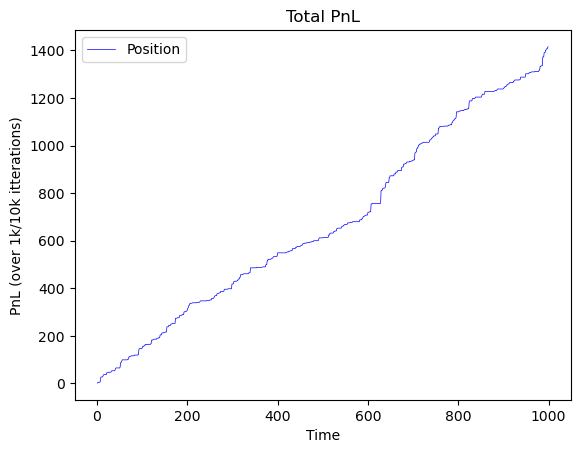

In [11]:
#PnL plot

#plot 1 pnl x time
pnl = data_pnl['PnL']
t = data_pnl['timestamp']

plt.plot(pnl , label = 'Position', linewidth = 0.5, color = 'Blue')

#activate to see where mm trades
# mm_trade = data_pnl.loc[data_pnl['MMtrade?'] == True]['PnL']
# plt.plot(mm_trade, 'r+', label = 'MM trade')        
        
plt.xlabel('Time')
plt.ylabel('PnL (over 1k/10k itterations)')
plt.legend()
plt.title("Total PnL")
plt.show()

Data for log_MM_v1.1
Total trades done: 171 order trades and 78 MM trades
Final Cash balance: 21415.0 
Final Position: -2.0 
Unrealised PnL: 1415.0
Data for log_MM_v1


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\T

Total trades done: 171 order trades and 74 MM trades
Final Cash balance: -18646.0 
Final Position: 2.0 
Unrealised PnL: 1354.0
Data for log_MM_v2.1
Total trades done: 170 order trades and 77 MM trades
Final Cash balance: 41424.0 
Final Position: -4.0 
Unrealised PnL: 1424.0
Data for log_MM_v2
Total trades done: 171 order trades and 78 MM trades
Final Cash balance: 21415.0 
Final Position: -2.0 
Unrealised PnL: 1415.0


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\T

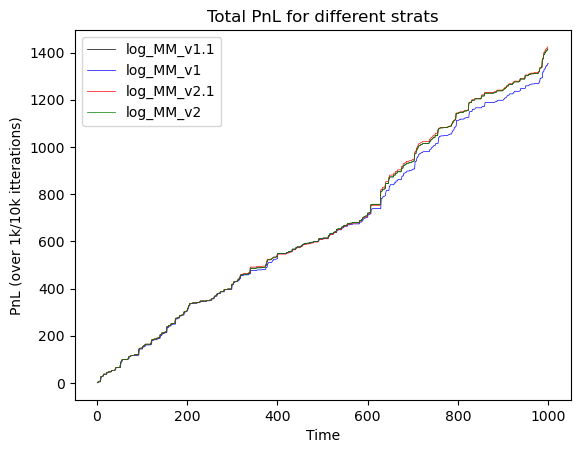

In [12]:
#itterative PnL plot
colours = ['black', 'blue', 'red', 'green', 'orange']
i=0
for n in dataframes:
    print(f'Data for {n}')
    data_pnl = get_pnl(get_data(dataframes[n]))
    pnl = data_pnl['PnL']
    t = data_pnl['timestamp']

    plt.plot(pnl , label = n, linewidth = 0.5, color = colours[i])
    i+=1
    #activate to see where mm trades
    # mm_trade = data_pnl.loc[data_pnl['MMtrade?'] == True]['PnL']
    # plt.plot(mm_trade, 'r+', label = 'MM trade')        

plt.xlabel('Time')
plt.ylabel('PnL (over 1k/10k itterations)')
plt.legend()
plt.title("Total PnL for different strats")
plt.show()

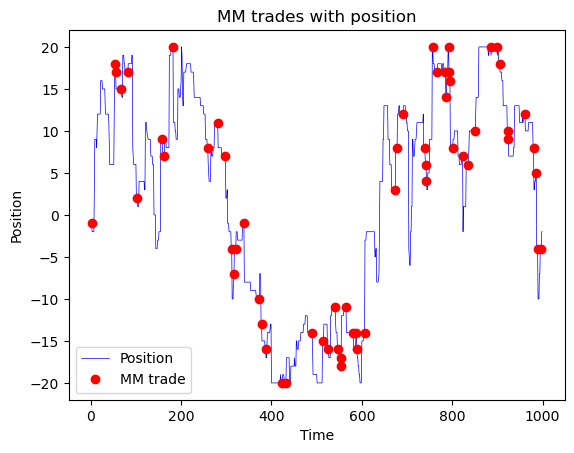

In [13]:
#useful to plot data with dots when we make a trade (mm or order) diff colour

#plot 2 pos x mm
pos = data3['Position']
t = data3['timestamp']

plt.plot(pos , label = 'Position', linewidth = 0.5, color = 'Blue')

plt.plot(data_mmhits2['Position'], 'ro', label = 'MM trade')        
        
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title("MM trades with position")
plt.show()


Data for log_MM_v1.1
Total trades done: 171 order trades and 78 MM trades
Final Cash balance: 21415.0 
Final Position: -2.0 
Unrealised PnL: 1415.0
Theoretical MM PnL: 469.0
Data for log_MM_v1
Total trades done: 171 order trades and 74 MM trades
Final Cash balance: -18646.0 
Final Position: 2.0 
Unrealised PnL: 1354.0
Theoretical MM PnL: 409.0
Data for log_MM_v2.1
Total trades done: 170 order trades and 77 MM trades
Final Cash balance: 41424.0 
Final Position: -4.0 
Unrealised PnL: 1424.0
Theoretical MM PnL: 481.0
Data for log_MM_v2


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\3825604392.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pos_T-1'][1] = 0
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\927695648.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Total trades done: 171 order trades and 78 MM trades
Final Cash balance: 21415.0 
Final Position: -2.0 
Unrealised PnL: 1415.0
Theoretical MM PnL: 469.0


C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\927695648.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mmhits2['MM_Bid'] = mmbid
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\927695648.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mmhits2['MM_Ask'] = mmask
C:\Users\tommy\AppData\Local\Temp\ipykernel_3608\927695648.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

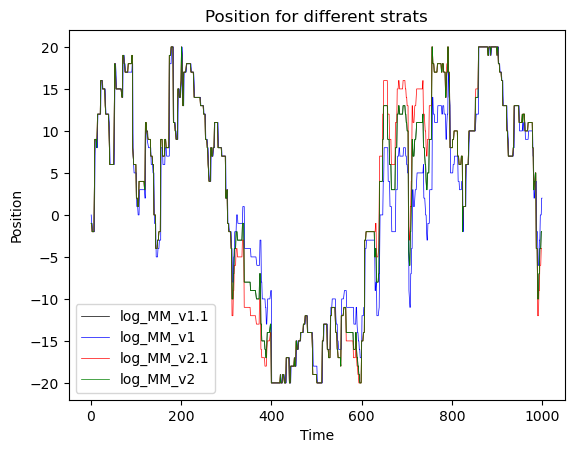

In [18]:
#itterative position plot
colours = ['black', 'blue', 'red', 'green', 'orange']
i=0
for n in dataframes:
    print(f'Data for {n}')
    
    
    data3 = get_pnl(get_data(dataframes[n]))
    hits = get_mmhits(data3)
    pos = data3['Position']
    t = data3['timestamp']

    plt.plot(pos , label = n, linewidth = 0.5, color = colours[i])
    i+=1
    #activate to see where mm trades
    #plt.plot(hits['Position'], 'ro', label = 'MM trade')        

    
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title("Position for different strats")
plt.show()

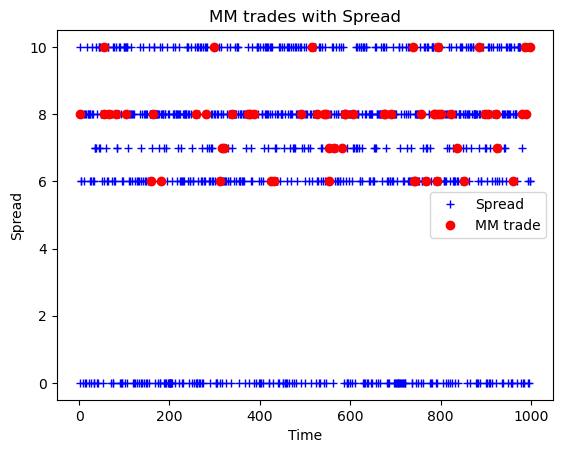

,timestamp,Product,Position,MM/order,Size_available,Price,Spread,Pos_T-1,Change,RealMMtrade?,MM_size


In [14]:
#plot 3 spread x mm
plt.plot(data3['Spread'], 'b+', label = 'Spread')
plt.plot(data_mmhits2['Spread'], 'ro', label = 'MM trade')    
plt.xlabel('Time')
plt.ylabel('Spread')
plt.legend()
plt.title("MM trades with Spread")
plt.show()
display(data3[data3['Spread'] == 5])

0.0 0.0
8.0 0.10248447204968944
10.0 0.0449438202247191
6.0 0.06666666666666667
7.0 0.08333333333333333


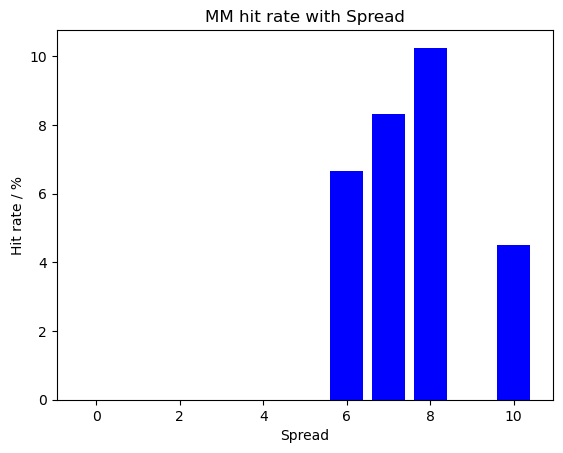

In [15]:
#plot 4 spread hit rate
spread_orders = Counter(data3['Spread'])
spread_hits = Counter(data_mmhits2['Spread'])
spread_hitrate = {}
for key in spread_orders.keys():
    spread_hitrate[key] = spread_hits[key]/spread_orders[key]
#print(spread_hitrate)

for k,r in spread_hitrate.items():
    print(k,r)
    plt.bar(k,r*100,color='blue')
    
plt.xlabel('Spread')
plt.ylabel('Hit rate / %')
plt.title("MM hit rate with Spread")
plt.show()

Counter({8.0: 33, 6.0: 12, 10.0: 8, 7.0: 7})
0.0 nan
8.0 8.636363636363637
10.0 11.5
6.0 5.166666666666667
7.0 4.285714285714286


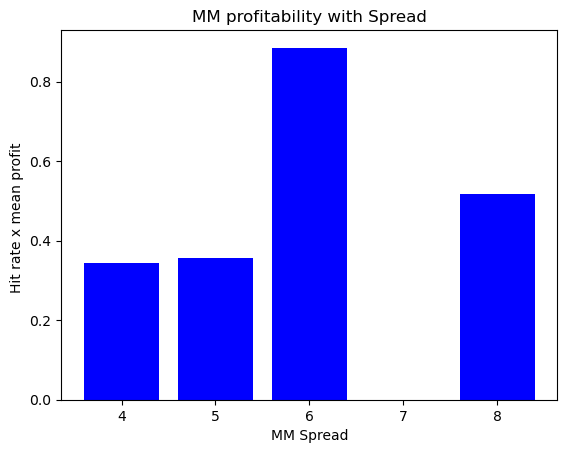

In [16]:
#plot 5 profitability does not include volume or theo yet
#display(data_mmhits)
spread_orders = Counter(data3['Spread'])
spread_hits = Counter(data_mmhits2['Spread'])
# print(spread_orders)
print(spread_hits)
# print(spread_hitrate)

spread_profitability = {}
for key in spread_orders.keys():
    av_theo = np.mean(data_mmhits2.loc[data_mmhits2['Spread'] == key, :]['Theo'])
    print(key, av_theo)
    spread_profitability[key] = (spread_hits[key]/spread_orders[key])*av_theo

for k,r in spread_profitability.items():
    #print(k,r)
    plt.bar(k-2,r,color='blue')
    
plt.xlabel('MM Spread')
plt.ylabel('Hit rate x mean profit ')
plt.title("MM profitability with Spread")
plt.show()

# 0 0.0
# 8 0.06521739130434782
# 10 0.06741573033707865
# 6 0.09444444444444444
# 7 0.08333333333333333